In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time_series = np.load('muparamssamples_5em6_0dot2mean_12000.npy')

In [3]:
time_series.shape

(2000, 33)

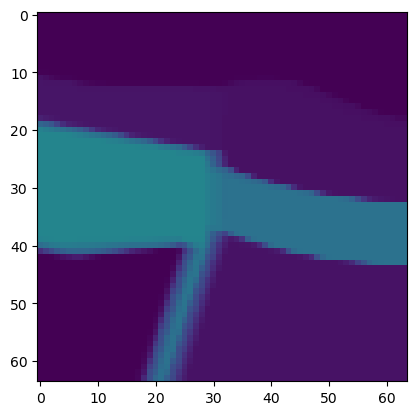

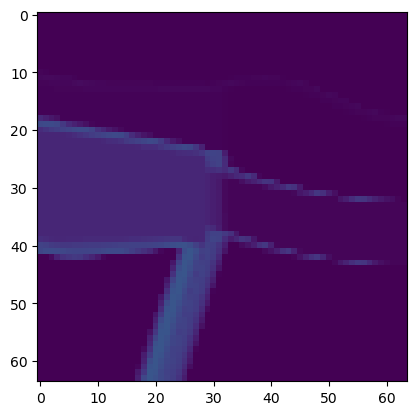

In [8]:
plt.imshow(np.mean(time_series, axis=0), vmin=0,vmax=40000)
plt.show()
plt.imshow(np.std(time_series, axis=0), vmin=0,vmax=40000)
plt.show()

In [7]:
mean_series = np.mean(time_series)
variance_series = np.var(time_series)

# Calculate autocorrelation for lag k
def autocorrelation(time_series, k):
    covariances = np.sum((time_series[:-k] - mean_series) * (time_series[k:] - mean_series))
    autocorr_k = covariances / (variance_series * len(time_series))
    return autocorr_k

# Calculate autocorrelation at lag k=1
autocorr = []
lags = []
for i in range(1,1200,50):
    lags.append(i)
    autocorr.append(autocorrelation(time_series, int(i)))

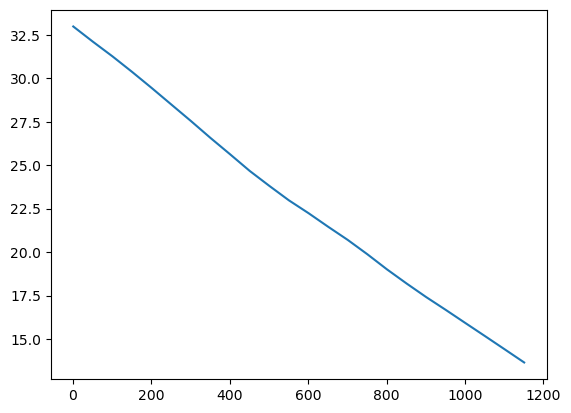

In [8]:
plt.plot(lags, autocorr)

In [ ]:
class AUTOCORRELATION:
    """This class is defined by using the definition of autocorrelation
    described in Box and Jenkins (1976).
    The class is defined for 1D vectors.
    """
    def calc_autocorrelation_lag(self, samples, mean, lag):
        mean = np.reshape(mean, newshape=(1, len(mean)))
        mean1 = np.repeat(mean, len(samples)-lag, axis=0)
        mean2 = np.repeat(mean, len(samples), axis=0)
        nominator = np.sum(np.multiply(samples[:len(samples)-lag,:]-mean1, samples[lag:,:]-mean1))
        denominator = np.sum(np.power(samples-mean2, 2))
        return nominator/denominator
    def __call__(self, samples, lags):
        mean  = np.mean(samples, axis=0)
        correlations = np.zeros(len(lags))
        for i in range(len(lags)):
            correlations[i] = self.calc_autocorrelation_lag(samples, mean, lags[i])
        return correlations
        

In [ ]:
autocorr = AUTOCORRELATION()

In [ ]:
lags = np.arange(1,10000,50)
autocorr_list_hmc = autocorr(uqnet_hmc.samples,lags)
autocorr_list_mcmc = autocorr(uqnet_mcmc.samples,lags)

In [ ]:
fig, ax = plt.subplots()
ax.plot(lags, autocorr_list_hmc, label="HMC")
ax.plot(lags, autocorr_list_mcmc, label="MCMC")
plt.legend()
ax.grid(True)
plt.show()